In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colorsys
from math import sqrt


In [2]:
filename = 'big.dem'
with open(filename, 'r') as f:
    lines = f.readlines()
    lines = [line.strip() for line in lines]
    lines = [line.split() for line in lines]
    lines = [[float(value) for value in line] for line in lines]

dane=lines[0]


lines = lines[1:]


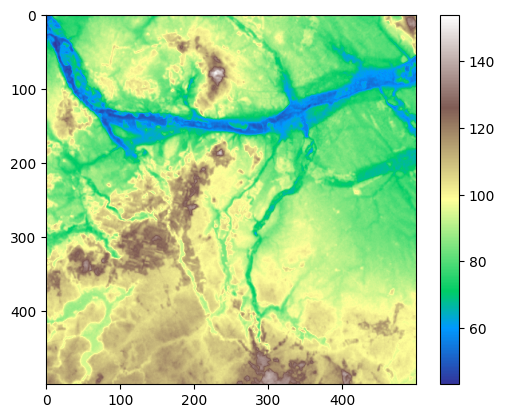

In [3]:
lines = np.array(lines)

plt.imshow(lines, cmap='terrain')
plt.colorbar()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


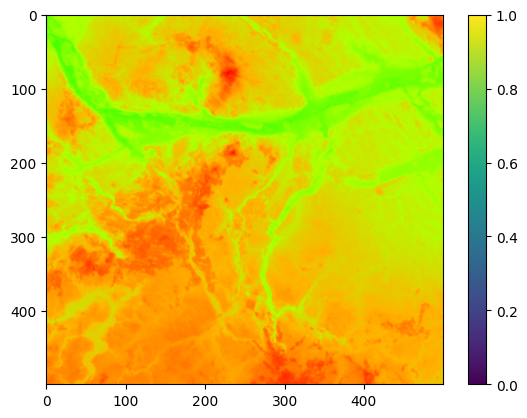

In [4]:

max_value = np.amax(lines)
img = np.zeros((int(dane[0]), int(dane[1]), 3))
for i in range(int(dane[0])):
    for j in range(int(dane[1])):
        img[i, j] = [-(abs(2*lines[i][j]/max_value-2))+1.7, -(abs(2*lines[i][j]/max_value))+2, 0]

plt.imshow(img, aspect='auto')

plt.colorbar()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


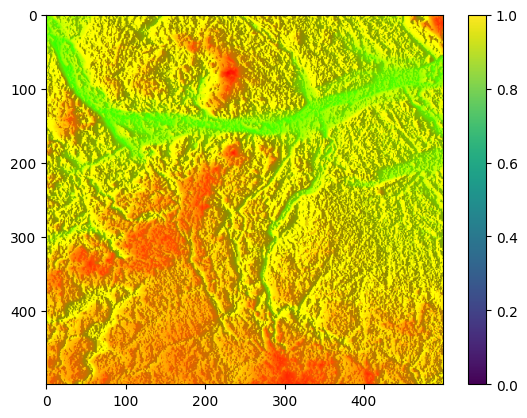

In [5]:
for i in range(int(dane[0])):
    for j in range(int(dane[1])):
        temp= [img[i, j][0], img[i, j][1], img[i, j][2]]
        temp=list(colorsys.rgb_to_hsv(temp[0], temp[1], temp[2]))
        if j>0 and lines[i][j]>lines[i][j-1] :
            temp[2]=temp[2]+0.3
        elif j>0 and lines[i][j]<lines[i][j-1] :
            temp[2]=temp[2]-0.3
        img[i, j]=colorsys.hsv_to_rgb(temp[0], temp[1], temp[2])
plt.imshow(img, aspect='auto')
plt.colorbar()
plt.show()


In [7]:
def niech_stanie_sie_swiatlosc(angle):
    return 1-abs(angle/180)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


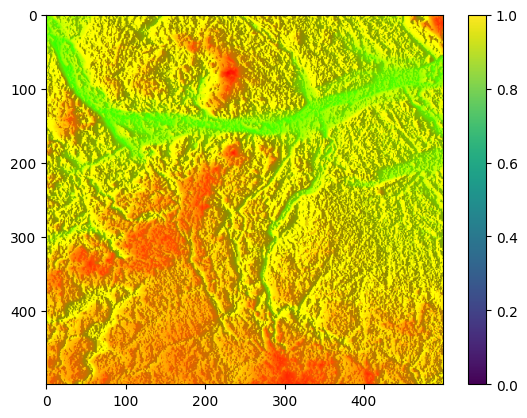

In [10]:
plt.imshow(img, aspect='auto')
plt.colorbar()
plt.show()

In [14]:
s=[-1,0]
dane[2]=dane[2]/100


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


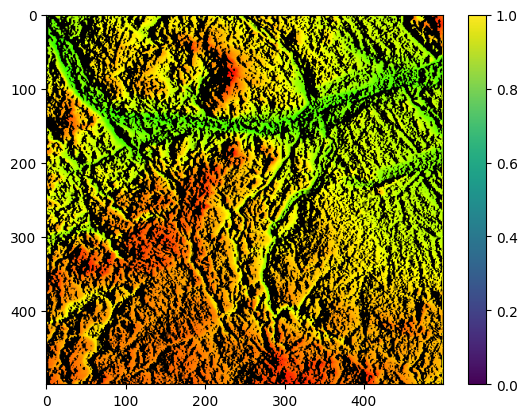

[[[3.50655261e-01 1.34934474e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  ...
  [1.00000000e+00 6.31875972e-01 0.00000000e+00]
  [1.00000000e+00 6.58112882e-01 0.00000000e+00]
  [6.94597249e-01 4.92632381e-01 0.00000000e+00]]

 [[3.59968809e-01 1.34003119e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  ...
  [1.00000000e+00 5.43988701e-01 0.00000000e+00]
  [1.00000000e+00 5.81712062e-01 0.00000000e+00]
  [7.43518069e-01 4.67750576e-01 0.00000000e+00]]

 [[3.76413395e-01 1.32358661e+00 0.00000000e+00]
  [2.73013125e-01 9.99999950e-01 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  ...
  [1.00000000e+00 4.45623206e-01 0.00000000e+00]
  [1.00000000e+00 5.00437799e-01 0.00000000e+00]
  [8.01032498e-01 4.35765916e-01 0.00000000e+00]]

 ...

 [[1.18080862e+00 5.19191376e-01 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.0000

In [13]:
img2=img.copy()
for i in range(int(dane[0])):
    for j in range(int(dane[1])):
       if j>0 and j<dane[1]-1:
           p1=[0,lines[i][j-1]]
           p3=[dane[2]*2,lines[i][j+1]]
           a=(p3[1]-p1[1])/(dane[2]*2)
           b=p1[1]
           v=[a,-1]
           v=v/np.linalg.norm(v)
           vlength=sqrt(v[0]**2+v[1]**2)
           slength=sqrt(s[0]**2+s[1]**2)
           cos=(np.dot(v,s))/(vlength*slength)
           angle=np.arccos(cos)
           angle=angle*180/np.pi
           temp= [img2[i, j][0], img2[i, j][1], img2[i, j][2]]
           temp=list(colorsys.rgb_to_hsv(temp[0], temp[1], temp[2]))
           temp[2]=niech_stanie_sie_swiatlosc(angle)
           img2[i, j]=colorsys.hsv_to_rgb(temp[0], temp[1], temp[2])
plt.imshow(img2, aspect='auto')
plt.colorbar()
plt.show()

print(img2)

